In [182]:
#data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_test = [train_df, test_df]

print train_df.columns.values
print test_df.columns.values

#Lets first drop the columns that dont add significant value to our model
train_df=train_df.drop(['PassengerId','Name','Ticket'],axis=1)
test_df=test_df.drop(['PassengerId','Name','Ticket'],axis=1)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [131]:
#Earlier I thought that cabins might point out Passengers in Upper Classes(more chances of survival)
train_df[["Cabin", "Survived"]].groupby(['Cabin'], as_index=False).mean().sort_values(by="Survived", ascending=False)
#But now it seems that it does not have any significant impact and moreover it has alot of NaN values
train_df=train_df.drop(['Cabin'],axis=1)
test_df=test_df.drop(['Cabin'],axis=1)

0
0


In [183]:
#Sex

print train_df[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean().sort_values(by="Survived",ascending=False)

train_test = [train_df, test_df]
train_df.shape, test_df.shape



      Sex  Survived
0  female  0.742038
1    male  0.188908


((891, 9), (418, 8))

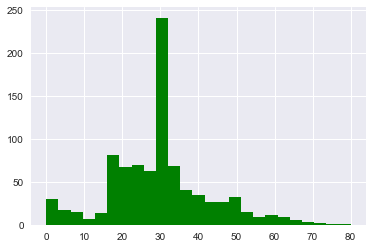

In [94]:
#Comparing Age

train_df["Age"].isnull().sum()
mean_age_train=train_df.Age.mean()
train_df["Age"]=train_df["Age"].fillna(mean_age_train).astype(int)

test_df["Age"].isnull().sum()
mean_age_test=test_df.Age.mean()
test_df["Age"]=test_df["Age"].fillna(mean_age_test).astype(int)

plt.hist(x=train_df.Age,bins=25, facecolor="green")
plt.show()

In [54]:
#Comparing Sibsp and Parch with survivability

print train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by="Survived", ascending=False)
print "------"
print train_df[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by="Survived", ascending=False)

   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
------
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


In [140]:
#Embarked

print train_df[["Embarked","Survived"]].groupby(["Embarked"],as_index=False).mean().sort_values(by="Survived",ascending=False)

#Checking for null values in Embarked
print train_df["Embarked"].isnull().sum()
print test_df["Embarked"].isnull().sum()

#Padding the null values
train_df.Embarked=train_df.Embarked.fillna(method='pad')

for dataset in train_test:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

  Embarked  Survived
0        C  0.556213
1        Q  0.397436
2        S  0.336957
0
0


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7.2500,0
1,1,1,1,38,1,0,71.2833,1
2,1,3,1,26,0,0,7.9250,0
3,1,1,1,35,1,0,53.1000,0
4,0,3,0,35,0,0,8.0500,0


In [107]:
#Fare

#train_df[["Fare","Survived"]].groupby(["Fare"],as_index=False).mean().sort_values(by="Survived",ascending=False)

train_df.Fare.isnull().sum()
test_df.Fare.isnull().sum()

#I encountered a null value in the test data set and hence I replaced it with the mean of the test data set 
test_df.Fare=test_df.Fare.fillna(test_df.Fare.mean())

0

In [109]:
#Pclass

print train_df[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by="Survived", ascending=False)

train_df.Pclass.isnull().sum()
test_df.Pclass.isnull().sum()

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


0

In [149]:
#Preparing training dataframes

X_train = train_df.drop("Survived",axis=1)
Y_train = train_df["Survived"]
X_test  = test_df

X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null int64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null int64
dtypes: float64(1), int64(6)
memory usage: 22.9 KB


In [174]:
#Logistic Regression

reg=LogisticRegression()
reg.fit(X_train,Y_train)
Y_pred=reg.predict(X_test)

reg_acc=reg.score(X_train,Y_train)
reg_acc

0.80134680134680136

In [173]:
#SVM

svc=SVC()
svc.fit(X_train,Y_train)
Y_pred=svc.predict(X_test)

svc_acc=svc.score(X_train,Y_train)
svc_acc

0.89113355780022452

In [172]:
#K Nearest Neighbours

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
knn_acc = knn.score(X_train, Y_train)
knn_acc

0.83389450056116721

In [171]:
#Gaussian Naive Bayes

gauss = GaussianNB()
gauss.fit(X_train, Y_train)
Y_pred = gauss.predict(X_test)
gauss_acc = gauss.score(X_train, Y_train)
gauss_acc

0.79461279461279466

In [177]:
#Decision Tree

dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
Y_pred = dt.predict(X_test)
dt_acc = dt.score(X_train, Y_train)
dt_acc

0.97643097643097643

In [179]:
# Random Forest

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)
acc_dt = rf.score(X_train,Y_train)
acc_dt

0.97643097643097643

In [181]:
# Linear SVC

lsvc = LinearSVC()
lsvc.fit(X_train, Y_train)
Y_pred = lsvc.predict(X_test)
acc_svc = lsvc.score(X_train, Y_train)
acc_svc

0.80808080808080807